In [1]:
import numpy as np
import matplotlib.pyplot as plt

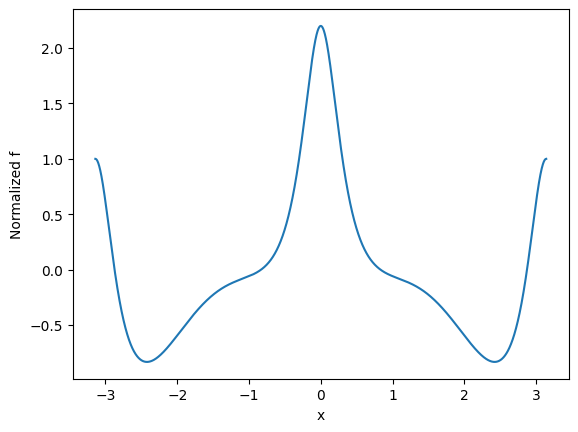

In [58]:
# a1s = np.sort(np.random.rand(5)) * np.exp(1j*(2*np.pi*np.random.rand(5)))
xs = np.linspace(-np.pi,np.pi,10000)
Q = 0.5 + 0j
R = 0+ 0j
a1s = np.array([Q**n for n in range(1,200)])
eps = 0.3
a1s[0] = eps
b1s = np.array([R**(2*n-1) for n in range(1,200)])
b1s[0] = eps

f = 0*xs
for i,n in enumerate(np.arange(1,len(a1s)+1)):
    f+= (a1s[i]*np.exp((2*n)*1j*xs) + a1s[i].conj()*np.exp((-2*n)*1j*xs)).real
    # if n ==1:
    f+= (b1s[i]*np.exp((2*n-1)*1j*xs) + b1s[i].conj()*np.exp((-2*n+1)*1j*xs)).real
# Normalize f so that the sum is 1
f = f / np.sum(f)

# Plot the normalized f
plt.plot(xs, f)
plt.xlabel('x')
plt.ylabel('Normalized f')
# plt.title('Normalized f over the range -π to π')
plt.show()